In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from NeighbourClustering import *
from NetworkSimulationClass import *
from scipy.signal import correlate2d

In [4]:
N = 32
T = 20
c = 0.2
r = 0.2
p_win = 0.5


In [5]:
testsim = NetworkSimulation(num = N,T=T, r=r, c=c)
testsim.simulate()

In [6]:
testsim.ClustTop, testsim.ClustBottom

(0.27184466019417475, 0.7184466019417476)

In [7]:
testsim.CorrLengthTop, testsim.CorrLengthBottom

(1.0, 4.0)

In [8]:
def Flattened_to_2DIndex(Array, n):
    '''
    Array: 1d enumeration of a previously n x n shaped array
    n: integer with len(Array) == n*n
    '''
    assert(len(Array) == n*n)
    i_index = (Array/n).astype(int)
    j_index = Array%n
    output = np.empty((n*n,2))
    output[:,0] = i_index
    output[:,1] = j_index
    return(output)



In [37]:
def L1_Norm_Periodic(N_agents,Indices_A):
    
    # create 2d enumeration and flatten it
    Enumeration = np.arange(0,N_agents*N_agents).reshape((N_agents,N_agents))
    FlatEnumeration = Enumeration.flatten()
    
    # transform the flattened enumeration to (i,j) indices of the 2d map
    indices = Flattened_to_2DIndex(FlatEnumeration, N_agents)

    # Calculate the L1 Distances from the Indices of A
    Norm  = (abs(indices - Indices_A))#.sum(axis = 1)

    x,y = abs(indices - np.array(Indices_A))[:,0], abs(indices - np.array(Indices_A))[:,1]
    x = np.where(x <= -x+N_agents, x, -x+N_agents) # Boundary Condition
    y = np.where(y <= -y+N_agents, y, -y+N_agents)
    Norm = x+y
    Norm = Norm.reshape((N_agents,N_agents))
    return(Norm)

In [50]:
1.*(L1_Norm_Periodic(10, Indices_A = [2,2]) <= 2)  * (L1_Norm_Periodic(10, Indices_A = [2,2]) != 0)

array([[0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 1., 1., 0., 0., 0., 0., 0., 0.],
       [1., 1., 0., 1., 1., 0., 0., 0., 0., 0.],
       [0., 1., 1., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

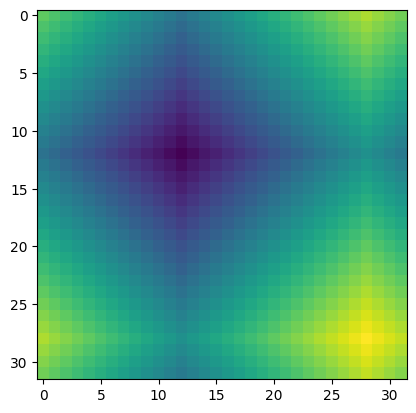

In [39]:
plt.imshow(L1_Norm_Periodic(N, Indices_A = [12,12]))

In [55]:
NextNextNearestNeighbours = 1.*(L1_Norm_Periodic(10, Indices_A = [2,2]) <= 2)  * (L1_Norm_Periodic(10, Indices_A = [2,2]) != 0)
indices_tuple = np.nonzero(NextNextNearestNeighbours)
indices_tuple, NextNextNearestNeighbours

((array([0, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 4]),
  array([2, 1, 2, 3, 0, 1, 3, 4, 1, 2, 3, 2])),
 array([[0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 1., 1., 0., 0., 0., 0., 0., 0.],
        [1., 1., 0., 1., 1., 0., 0., 0., 0., 0.],
        [0., 1., 1., 1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]]))

In [62]:
indices_tuple[0], indices_tuple[1], len(indices_tuple[0])

(array([0, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 4]),
 array([2, 1, 2, 3, 0, 1, 3, 4, 1, 2, 3, 2]),
 12)

In [66]:
[np.array((indices_tuple[0][i], indices_tuple[1][i])) for i in range(len(indices_tuple[0]))]

[array([0, 2]),
 array([1, 1]),
 array([1, 2]),
 array([1, 3]),
 array([2, 0]),
 array([2, 1]),
 array([2, 3]),
 array([2, 4]),
 array([3, 1]),
 array([3, 2]),
 array([3, 3]),
 array([4, 2])]

In [75]:
def Sample_Agent_B(N_agents, Indices_A, CircularBoundary = True):
    '''
    N_agents: integer (number of agents)
    Indices_A: 2d integer array (kth row of this array gives the x/y coordinates of agent k)
    '''
    
    # create 2d enumeration and flatten it
    Enumeration = np.arange(0,N_agents*N_agents).reshape((N_agents,N_agents))
    FlatEnumeration = Enumeration.flatten()
    
    # transform the flattened enumeration to (i,j) indices of the 2d map
    indices = Flattened_to_2DIndex(FlatEnumeration, N_agents)

    # Do we need to take "periodic" boundary conditions into account?
    if CircularBoundary==True: # top and bottom and left/right margin are neighbours
        ListIndices_Neighbours_A = [( Indices_A + [1,0])%N_agents,
                                        ( Indices_A + [-1,0])%N_agents,
                                        ( Indices_A + [0,1])%N_agents,
                                        ( Indices_A + [0,-1])%N_agents
                                   ]

    elif CircularBoundary>1: # next-next-...-nearest neighbours
        Norm_map = L1_Norm_Periodic(N_agents, Indices_A)  # get the norm with periodic boundary conditions

        # use CircularBoundary as the maximum distance for a possible contract
        # and disregard the agent itself (distance !=0)
        neighbourhood = 1.*(Norm_map <= CircularBoundary)  * (Norm_map != 0)
        indices_tuple = np.nonzero(neighbourhood) # get the indices of chosen neighbourhood, this is touple of x and y indices

        # finally iterate over the indices to make a list of np.array([x_index, y_index]) coordinates
        ListIndices_Neighbours_A = [np.array((indices_tuple[0][i], indices_tuple[1][i])) for i in range(len(indices_tuple[0]))]
        
    else: # Calculate the L1 Distances from the Indices of A
        Norm  = (abs(indices - Indices_A)).sum(axis = 1)
        Norm.reshape((N_agents,N_agents))
    # Safety check
    #ax = sns.heatmap(Norm.reshape((N_agents,N_agents)), linewidth=0.5)
    #plt.title("Distances")
    #plt.show()
    
    # Now create a list of only those indices that are exactly 1 distance away from A
        ListIndices_Neighbours_A = list(indices[Norm == 1])
    
    return(ListIndices_Neighbours_A)

In [77]:
Sample_Agent_B(10, np.array([0,0]), 2)

[array([0, 1]),
 array([0, 2]),
 array([0, 8]),
 array([0, 9]),
 array([1, 0]),
 array([1, 1]),
 array([1, 9]),
 array([2, 0]),
 array([8, 0]),
 array([9, 0]),
 array([9, 1]),
 array([9, 9])]

In [79]:
True == 1

True

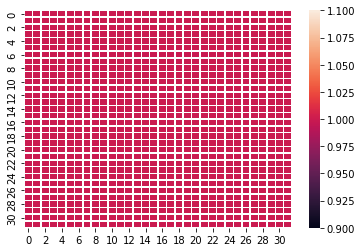

In [3]:
Agents = np.ones((N,N))

ax = sns.heatmap(Agents, linewidth=0.5)
plt.show()


for t in range(0):  # time units
    for n in range(N*N): # time steps
        
        # A has the risk and wants to buy insurance
        i_A = np.random.randint(0,N)
        j_A = np.random.randint(0,N)
        
        # B is considering to sell the insurance and take on the risk
        i_B, j_B = i_A, j_A
        while (i_B ==i_A) and (j_B==j_A):
            i_B = np.random.randint(0,N)
            j_B = np.random.randint(0,N)
         
        w_A = Agents[i_A,j_A]
        w_B = Agents[i_B, j_B]
        G = r*w_A
        C = c*w_A
            
        F_max = w_A - ((w_A + G)**0.5) * ((w_A-C)**0.5)
        
        F_min = -w_B  + 0.5*np.sqrt(4*w_B**2 + (G+C)**2 ) + (C-G)/2.
        #print("A:",w_A, F_max)
        #print("B:", w_B, F_min)
        #print("\n")
        
        p = np.random.uniform(0,1)
        win = p>0.5
        
        if (F_min >= F_max) or (w_B <= C): 
            # B demands more than A is willing to pay:
            # no contract
            
            if win:
                Agents[i_A, j_A] *= (1+r)
            else:
                Agents[i_A,j_A] *= (1-c)
                
                
        elif F_min < F_max and (w_B > C):
            # make a contract at midway fee
            F = 0.5*(F_min + F_max) 
            
            Agents[i_A,j_A] -= F 
            
            #print(F_min, F, F_max)
            #print(i_A, j_A, i_B, j_B)
            #print("\n")
            if win:
                Agents[i_B, j_B] += (F +  G)
            else:
                Agents[i_B, j_B] += (F-C)
            

            
    print("Time unit", t)
    print("Mean", np.mean(Agents))
    print("Median", np.median(Agents))
    ax = sns.heatmap(Agents, linewidth=0.5)
    plt.show()
    print("\n")

## Enumerate Indices

Start with an enumeration from 0 to N^2-1, then flatten this array. Use /N and %N and int() to retrieve the original indices from this 1d enumeration array. 

In [4]:
Enumeration = np.arange(0,N*N).reshape((N,N))

I, J = 5,3



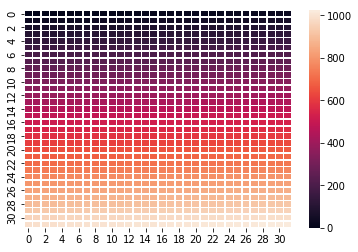

array([[   0,    1,    2, ...,   29,   30,   31],
       [  32,   33,   34, ...,   61,   62,   63],
       [  64,   65,   66, ...,   93,   94,   95],
       ...,
       [ 928,  929,  930, ...,  957,  958,  959],
       [ 960,  961,  962, ...,  989,  990,  991],
       [ 992,  993,  994, ..., 1021, 1022, 1023]])

In [5]:
sns.heatmap(Enumeration, linewidth = 0.5)
plt.show()
Enumeration

In [6]:

FlatEnumeration = Enumeration.flatten()
k = (FlatEnumeration / N).astype(int)
l =(FlatEnumeration% N).astype(int)

indices = np.empty((N*N,2))
indices[:,0] = k
indices[:,1] = l
indices

array([[ 0.,  0.],
       [ 0.,  1.],
       [ 0.,  2.],
       ...,
       [31., 29.],
       [31., 30.],
       [31., 31.]])

## Norms

Test out some distance norms on the array of indices. reshape((N,N)) retransforms this into a matrix depiction.

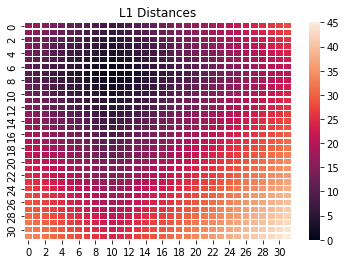

In [7]:
L1Norm  = abs(indices - np.array((7,10))).sum(axis = 1)
L1Norm.reshape((N,N))
ax = sns.heatmap(L1Norm.reshape((N,N)), linewidth=0.5)
plt.title("L1 Distances")
plt.show()

In [8]:
np.where(L1Norm == 0)

(array([234]),)

In [9]:
122%16, int(122/16)

(10, 7)

### Function

Function Flattened_to_2DIndex takes an array and integer and turns it into an 

In [10]:
def Flattened_to_2DIndex(Array, n):
    
    i_index = (Array/n).astype(int)
    j_index = Array%n
    output = np.empty((n*n,2))
    output[:,0] = i_index
    output[:,1] = j_index
    return(output)

In [11]:
Flattened_to_2DIndex(np.arange(5*5),5)

array([[0., 0.],
       [0., 1.],
       [0., 2.],
       [0., 3.],
       [0., 4.],
       [1., 0.],
       [1., 1.],
       [1., 2.],
       [1., 3.],
       [1., 4.],
       [2., 0.],
       [2., 1.],
       [2., 2.],
       [2., 3.],
       [2., 4.],
       [3., 0.],
       [3., 1.],
       [3., 2.],
       [3., 3.],
       [3., 4.],
       [4., 0.],
       [4., 1.],
       [4., 2.],
       [4., 3.],
       [4., 4.]])

In [12]:
ListIndices_not_i = list(Flattened_to_2DIndex(FlatEnumeration,N)[L1Norm != 0])
L = len(ListIndices_not_i)  # everything with nonzero norm, i.e. every OTHER point but "i"

In [13]:
Probab = (1/L1Norm[L1Norm!=0])**2 
Probab = Probab/sum(Probab)
chosen = np.random.choice(L, p = Probab)
chosen, ListIndices_not_i[chosen]

(232, array([7., 8.]))

In [14]:
Sample = np.zeros((N,N))

for trial in range(100):
    chosen = np.random.choice(L, p = Probab)
    chosen, ListIndices_not_i[chosen]
    
    Sample[ListIndices_not_i[chosen].astype(int)[0],
      ListIndices_not_i[chosen].astype(int)[1]] += 1

In [15]:
Sample

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

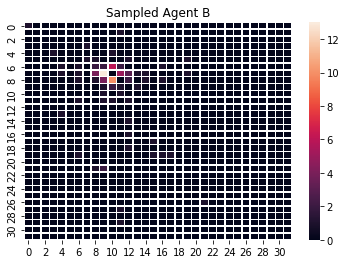

In [16]:
ax = sns.heatmap(Sample, linewidth=0.5)
plt.title("Sampled Agent B")
plt.show()

In [17]:
def Flattened_to_2DIndex(Array, n):
    '''
    Array: 1d enumeration of a previously n x n shaped array
    n: integer with len(Array) == n*n
    '''
    assert(len(Array) == n*n)
    i_index = (Array/n).astype(int)
    j_index = Array%n
    output = np.empty((n*n,2))
    output[:,0] = i_index
    output[:,1] = j_index
    return(output)



def Sample_Agent_B(N_agents, Indices_A, Exponent = 2):
    '''
    N_agents: integer (number of agents)
    Indices_A: 2d integer array (kth row of this array gives the x/y coordinates of agent k)
    Exponent: Measures how much the probabiliy decreases with distance to choose the distant agent
    '''
    
    # create 2d enumeration and flatten it
    Enumeration = np.arange(0,N_agents*N_agents).reshape((N_agents,N_agents))
    FlatEnumeration = Enumeration.flatten()
    
    # transform the flattened enumeration to (i,j) indices of the 2d map
    indices = Flattened_to_2DIndex(FlatEnumeration, N_agents)

    # Calculate the L1 Distances from the Indices of A
    Norm  = (abs(indices - Indices_A)**Exponent).sum(axis = 1)
    Norm.reshape((N_agents,N_agents))
    # Safety check
    #ax = sns.heatmap(Norm.reshape((N_agents,N_agents)), linewidth=0.5)
    #plt.title("Distances")
    #plt.show()
    
    # Now create a list of only those indices that are not A! We want to select a DIFFERENT agent B!
    ListIndices_not_A = list(indices[Norm != 0])
    L = len(ListIndices_not_A)
    
    # Probabilities ~ 1/(Norm) as a model suggestion
    Prob = (1/Norm[Norm!=0]) 
    Prob = Prob/sum(Prob)
    chosen = np.random.choice(L, p = Prob)
    
    # returns the indices of an agent B with B!=A and (statistically) B close to A
    return(ListIndices_not_A[chosen])
    

In [18]:
indices,(abs(indices - np.array([3,2]))**2).sum(axis = 1)

(array([[ 0.,  0.],
        [ 0.,  1.],
        [ 0.,  2.],
        ...,
        [31., 29.],
        [31., 30.],
        [31., 31.]]),
 array([  13.,   10.,    9., ..., 1513., 1568., 1625.]))

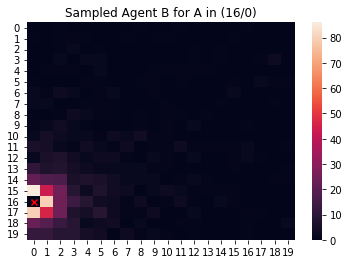

In [19]:
N_test = 20

Sample = np.zeros((N_test,N_test))

I = np.random.randint(0,N_test)
J = np.random.randint(0,N_test)
#print(I,J)
for trial in range(1000):
    chosen = np.random.choice(L, p = Probab)
    chosen, ListIndices_not_i[chosen]
    
    chosenindex = Sample_Agent_B(N_agents = N_test, Indices_A = np.array([I,J]).astype(int)).astype(int)
    #print(chosenindex)
    Sample[chosenindex[0],chosenindex[1]] += 1
    
ax = sns.heatmap(Sample)#, linewidth=0.5)
plt.scatter([J+0.5],[I+0.5],  c="red", marker="x")  # note that for plotting: x-axis is horizontal and hence the j value
                                                    # and y is vertical (i values): counterintuitive
plt.title("Sampled Agent B for A in ("+str(I)+"/"+str(J)+")")
plt.show()

#I,J

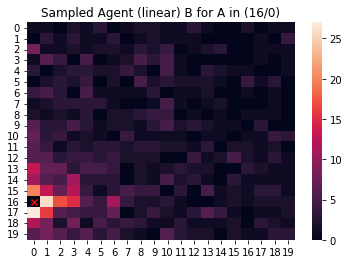

In [20]:
N_test = 20

Sample = np.zeros((N_test,N_test))

#print(I,J)
for trial in range(1000):
    chosen = np.random.choice(L, p = Probab)
    chosen, ListIndices_not_i[chosen]
    
    chosenindex = Sample_Agent_B(N_agents = N_test, 
                                 Indices_A = np.array([I,J]).astype(int),
                                 Exponent = 1).astype(int)
    #print(chosenindex)
    Sample[chosenindex[0],chosenindex[1]] += 1
    
ax = sns.heatmap(Sample)#, linewidth=0.5)
plt.scatter([J+0.5],[I+0.5],  c="red", marker="x")  # note that for plotting: x-axis is horizontal and hence the j value
                                                    # and y is vertical (i values): counterintuitive
plt.title("Sampled Agent (linear) B for A in ("+str(I)+"/"+str(J)+")")
plt.show()

#I,J

## Now Simulation with Spatial Probability

In [21]:
AgentsTimeSeries = np.ones((N,N,T))


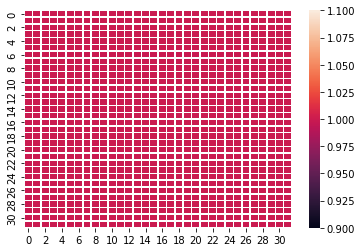

Time unit 0
Mean 0.9979779055395821
Median 0.7467436406404574
Number of contracts 771


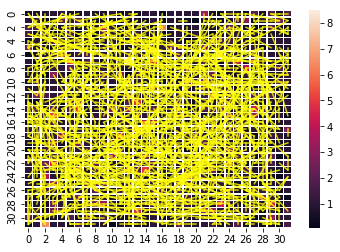

Mean Distance for Contract 5.2442911983932134


Time unit 1
Mean 0.9667698992447621
Median 0.5532563593595426
Number of contracts 640


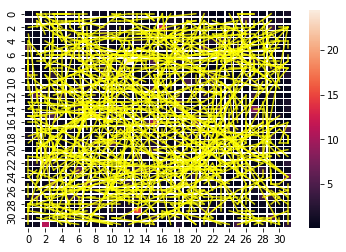

Mean Distance for Contract 5.383602979535088


Time unit 2
Mean 0.9791599647278696
Median 0.41488791650786877
Number of contracts 616


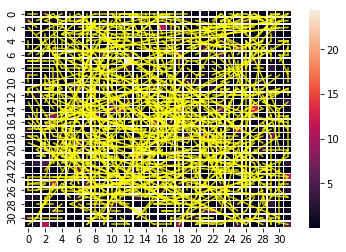

Mean Distance for Contract 4.932850999874305


Time unit 3
Mean 1.034180557338021
Median 0.3093551843933039
Number of contracts 600


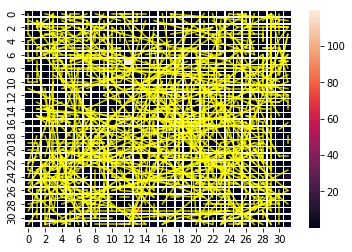

Mean Distance for Contract 5.40556852680588


Time unit 4
Mean 0.9964306428287464
Median 0.24264101813137046
Number of contracts 609


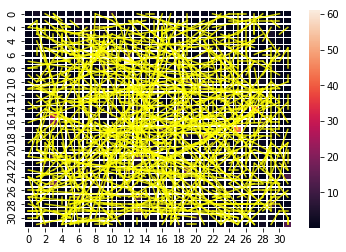

Mean Distance for Contract 5.50318050244162


Time unit 5
Mean 1.075495734918915
Median 0.1764588148002627
Number of contracts 553


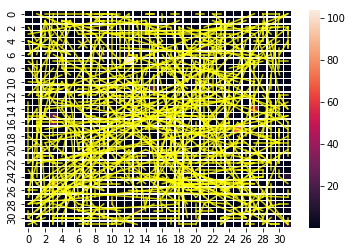

Mean Distance for Contract 5.197875255457391


Time unit 6
Mean 0.9807819406253453
Median 0.14314266102128348
Number of contracts 570


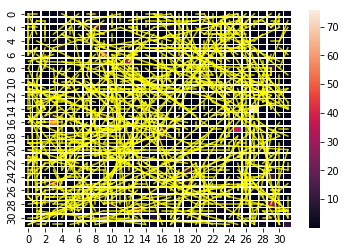

Mean Distance for Contract 4.903141322267797


Time unit 7
Mean 0.981650240079972
Median 0.1072391965722381
Number of contracts 572


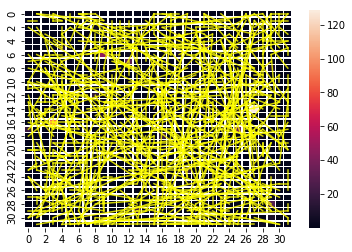

Mean Distance for Contract 5.54571587645579


Time unit 8
Mean 1.048010962138465
Median 0.08734120663579542
Number of contracts 586


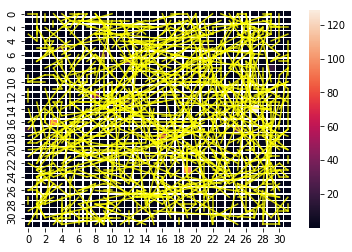

Mean Distance for Contract 4.752117486953155


Time unit 9
Mean 1.2216676752749036
Median 0.06090265407256125
Number of contracts 562


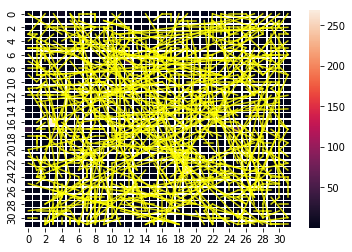

Mean Distance for Contract 5.583173821626588


Time unit 10
Mean 1.0122398738412821
Median 0.04555166103588559
Number of contracts 574


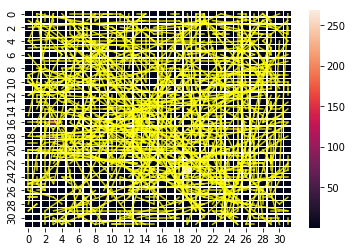

Mean Distance for Contract 5.599065547268299


Time unit 11
Mean 0.9042683772824768
Median 0.03254051113554035
Number of contracts 553


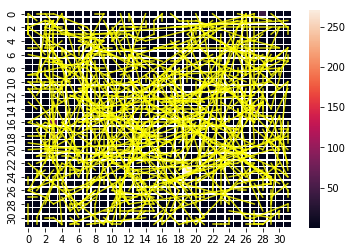

Mean Distance for Contract 5.204658631002718


Time unit 12
Mean 0.6717074927092721
Median 0.025694524412828483
Number of contracts 583


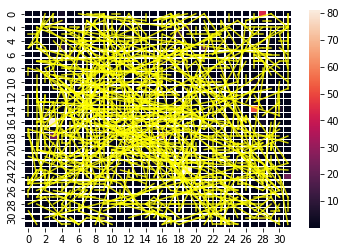

Mean Distance for Contract 5.409178035703092


Time unit 13
Mean 0.703812133090632
Median 0.020571216785612835
Number of contracts 544


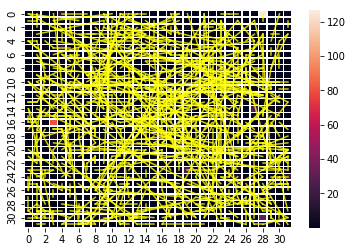

Mean Distance for Contract 5.073339108399633


Time unit 14
Mean 0.6957231826183267
Median 0.01642068456584562
Number of contracts 554


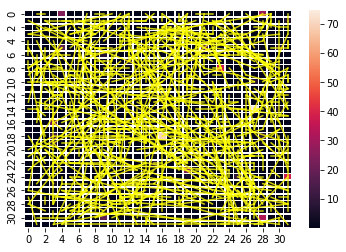

Mean Distance for Contract 5.197540626780399


Time unit 15
Mean 0.6786997564416712
Median 0.011771846008703754
Number of contracts 556


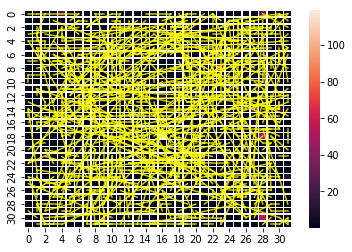

Mean Distance for Contract 5.213350185974608


Time unit 16
Mean 0.5509528917796502
Median 0.009108346806220104
Number of contracts 543


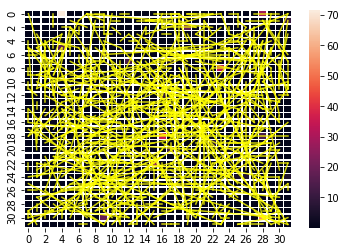

Mean Distance for Contract 5.4133873533624906


Time unit 17
Mean 0.5739305787270426
Median 0.006899482617489806
Number of contracts 558


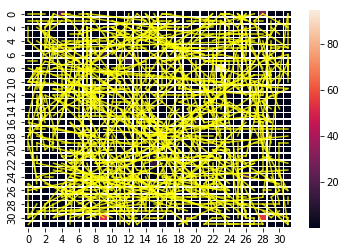

Mean Distance for Contract 5.441723163487382


Time unit 18
Mean 0.5829457011186374
Median 0.005353309215066437
Number of contracts 538


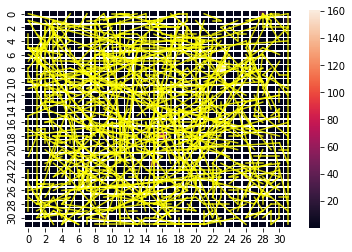

Mean Distance for Contract 5.4702265356032855


Time unit 19
Mean 0.43313699028123226
Median 0.004013333756937962
Number of contracts 564


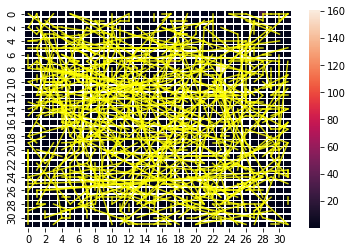

Mean Distance for Contract 5.105594327556489


Time unit 20
Mean 0.6462814967357011
Median 0.0031743509938293476
Number of contracts 554


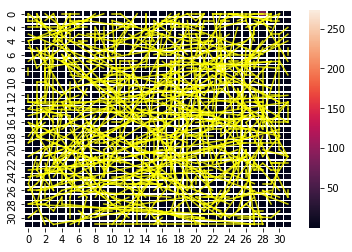

Mean Distance for Contract 5.1805966272868975


Time unit 21
Mean 0.6805408286579817
Median 0.002366022473283953
Number of contracts 560


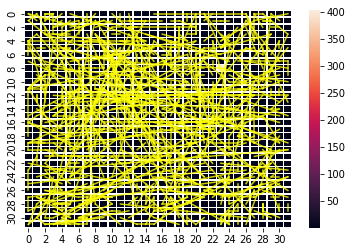

Mean Distance for Contract 5.177944564157786


Time unit 22
Mean 0.36283701533612456
Median 0.0019359684707697718
Number of contracts 571


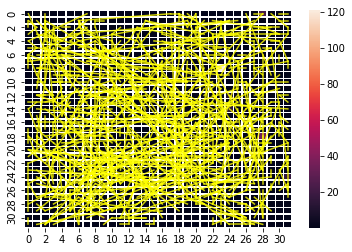

Mean Distance for Contract 5.833410616595659


Time unit 23
Mean 0.32570899322903935
Median 0.0014599409493185858
Number of contracts 542


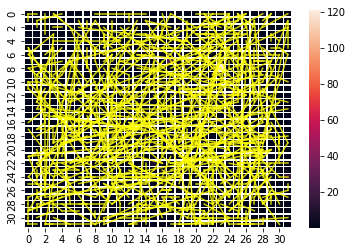

Mean Distance for Contract 5.7058429187745965


Time unit 24
Mean 0.2941265786919836
Median 0.0012082457656667038
Number of contracts 569


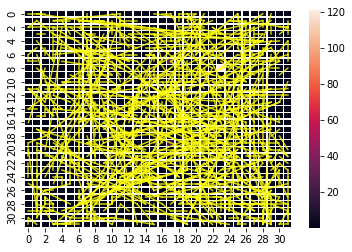

Mean Distance for Contract 5.273768980835444


Time unit 25
Mean 0.17491044152810295
Median 0.0009285605938115138
Number of contracts 565


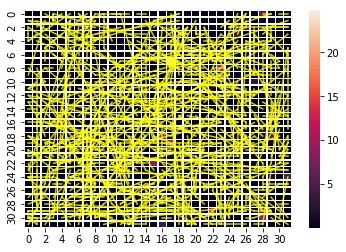

Mean Distance for Contract 5.078941798870113


Time unit 26
Mean 0.19468319352869928
Median 0.0007317715311141598
Number of contracts 551


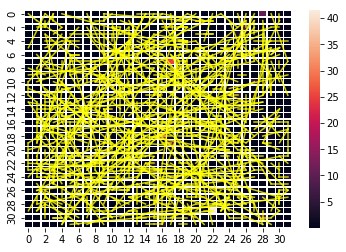

Mean Distance for Contract 4.941195134821686


Time unit 27
Mean 0.19073114206602018
Median 0.0006179214668758837
Number of contracts 546


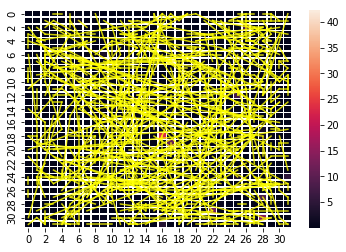

Mean Distance for Contract 5.508559334955495


Time unit 28
Mean 0.1366474436674697
Median 0.00047974192140680985
Number of contracts 537


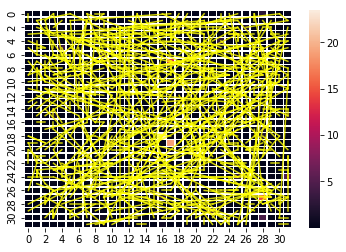

Mean Distance for Contract 5.537595551319949


Time unit 29
Mean 0.12544469658393623
Median 0.00038510009806476007
Number of contracts 549


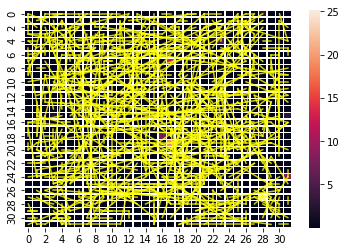

Mean Distance for Contract 5.359357720113836


Time unit 30
Mean 0.1005150053398421
Median 0.00028159241617149223
Number of contracts 533


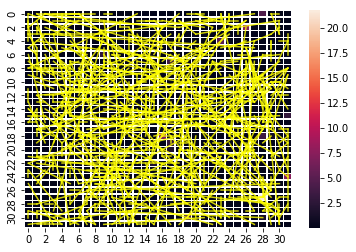

Mean Distance for Contract 5.447495231393644


Time unit 31
Mean 0.05974182419357464
Median 0.00021089453128571604
Number of contracts 561


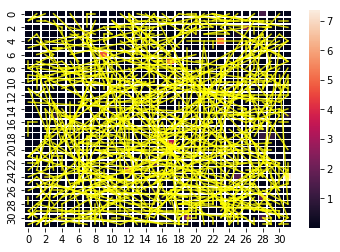

Mean Distance for Contract 5.597080489203046


Time unit 32
Mean 0.060466777369888196
Median 0.00017312761366240846
Number of contracts 576


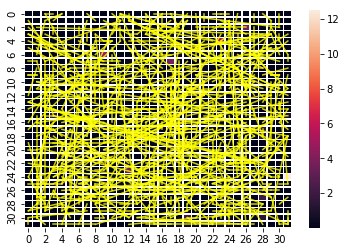

Mean Distance for Contract 5.488008132248696


Time unit 33
Mean 0.04974863495311696
Median 0.00012970564327556818
Number of contracts 548


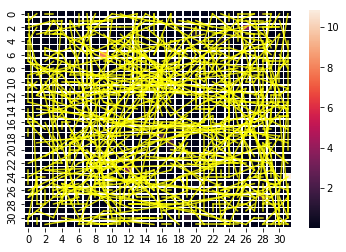

Mean Distance for Contract 5.365066975681699


Time unit 34
Mean 0.026640045886935526
Median 0.00010081621215011862
Number of contracts 523


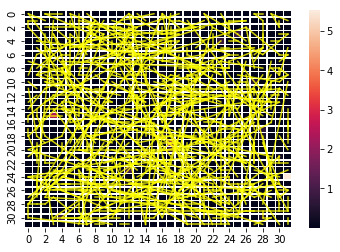

Mean Distance for Contract 5.426999609423249


Time unit 35
Mean 0.02132999627528558
Median 8.277243190495107e-05
Number of contracts 567


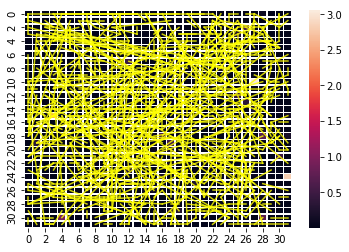

Mean Distance for Contract 5.620580025720836


Time unit 36
Mean 0.017343122432590827
Median 6.460766282078852e-05
Number of contracts 545


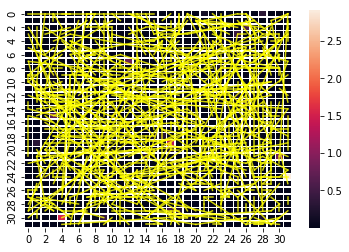

Mean Distance for Contract 5.476319123940264


Time unit 37
Mean 0.015899850325229392
Median 5.2434447624191856e-05
Number of contracts 548


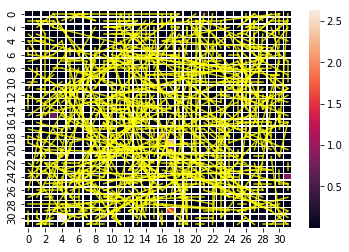

Mean Distance for Contract 5.228599180662309


Time unit 38
Mean 0.01348170858344758
Median 3.786866114760964e-05
Number of contracts 534


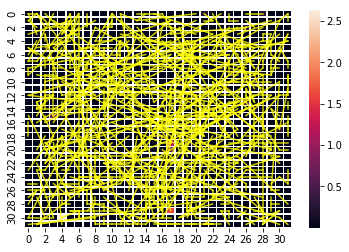

Mean Distance for Contract 5.314543795898697


Time unit 39
Mean 0.013198670618004936
Median 2.8390544738551987e-05
Number of contracts 522


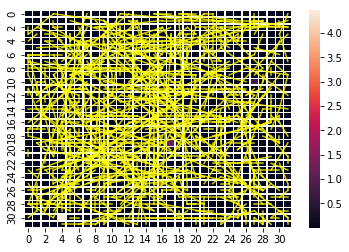

Mean Distance for Contract 5.170526019184063


Time unit 40
Mean 0.015075569258064279
Median 2.1760432944676747e-05
Number of contracts 565


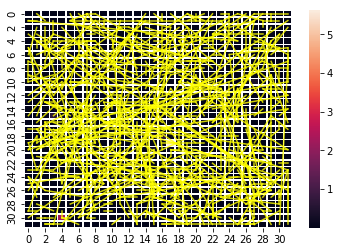

Mean Distance for Contract 5.264557738865268


Time unit 41
Mean 0.009443040270392875
Median 1.6503810722131478e-05
Number of contracts 543


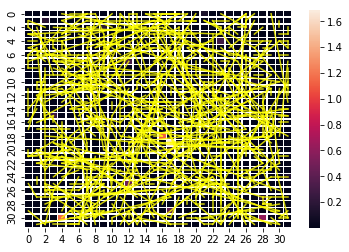

Mean Distance for Contract 5.001002682136745


Time unit 42
Mean 0.007450895754155216
Median 1.2422001651247268e-05
Number of contracts 546


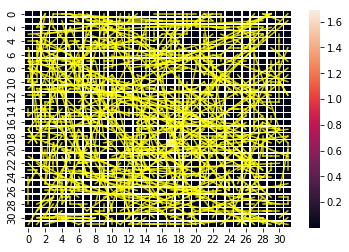

Mean Distance for Contract 5.318023053854707


Time unit 43
Mean 0.006138507790619644
Median 8.861057365918402e-06
Number of contracts 587


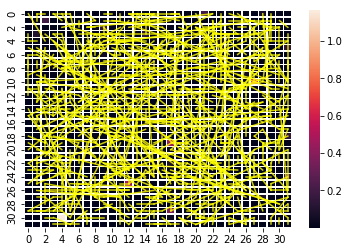

Mean Distance for Contract 4.694155664657207


Time unit 44
Mean 0.0072932689355820575
Median 6.143626285289791e-06
Number of contracts 531


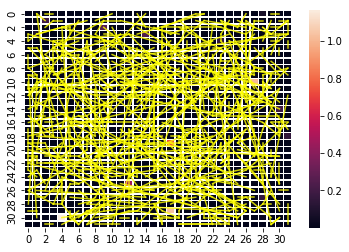

Mean Distance for Contract 5.199837757119867


Time unit 45
Mean 0.006656658600249691
Median 5.142438191010546e-06
Number of contracts 546


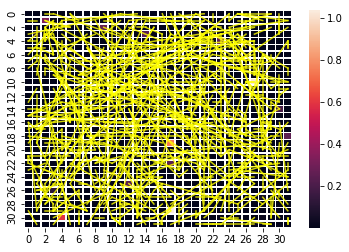

Mean Distance for Contract 5.214888487097414


Time unit 46
Mean 0.009110202800943983
Median 3.9300956261670805e-06
Number of contracts 557


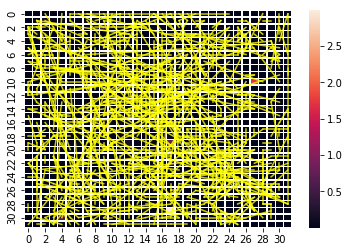

Mean Distance for Contract 5.164337672831455


Time unit 47
Mean 0.009979745194476034
Median 3.3032446839642136e-06
Number of contracts 544


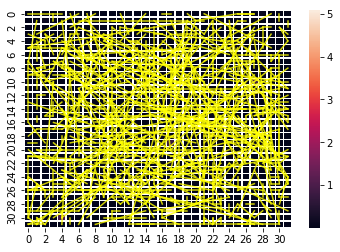

Mean Distance for Contract 5.6239971904122


Time unit 48
Mean 0.007868752584218378
Median 2.4251948804972153e-06
Number of contracts 523


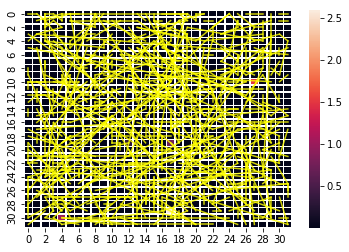

Mean Distance for Contract 5.003527747573889


Time unit 49
Mean 0.0052600230028496675
Median 1.9542107177324252e-06
Number of contracts 545


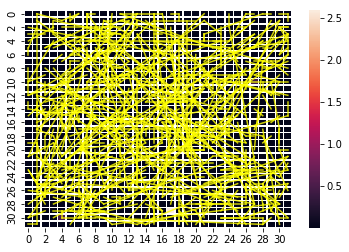

Mean Distance for Contract 5.526029350674502




In [22]:
AgentsTimeSeries = np.ones((N,N,T+1))

exponent = 2

Agents = np.ones((N,N))
AgentsTimeSeries[:,:,0] = Agents
ax = sns.heatmap(Agents, linewidth=0.5)
plt.show()


for t in range(T):  # time units
    
    Contracts = list()
    Distances = list()
    
    for n in range(N*N): # time steps
        
        
        
        # A has the risk and wants to buy insurance
        i_A = np.random.randint(0,N)
        j_A = np.random.randint(0,N)
        
        # B is considering to sell the insurance and take on the risk
        chosenindex = Sample_Agent_B(N_agents = N, 
                                 Indices_A = np.array([i_A,j_A]).astype(int),
                                 Exponent = exponent).astype(int)
        i_B = chosenindex[0]
        j_B = chosenindex[1]
         
        w_A = Agents[i_A,j_A]
        w_B = Agents[i_B, j_B]
        G = r*w_A
        C = c*w_A
            
        F_max = w_A - ((w_A + G)**0.5) * ((w_A-C)**0.5)
        
        F_min = -w_B  + 0.5*np.sqrt(4*w_B**2 + (G+C)**2 ) + (C-G)/2.
        #print("A:",w_A, F_max)
        #print("B:", w_B, F_min)
        #print("\n")
        
        p = np.random.uniform(0,1)
        win = p>p_win
        
        if (F_min >= F_max) or (w_B <= C): 
            # B demands more than A is willing to pay:
            # no contract
            
            if win:
                Agents[i_A, j_A] *= (1+r)
            else:
                Agents[i_A,j_A] *= (1-c)
                
                
        elif F_min < F_max and (w_B > C):
            # make a contract at midway fee
            F = 0.5*(F_min + F_max) 
            
            Agents[i_A,j_A] -= F 
            
            
            Contracts += [(i_A, j_A, i_B, j_B)]  # record the signed contract
            Distances += [ (abs(i_B - i_A)**exponent + abs(j_B-j_A)**exponent )**(1./exponent)  ]
            #print(Contracts[-1])
            #print(F_min, F, F_max)
            #print(i_A, j_A, i_B, j_B)
            #print("\n")
            if win:
                Agents[i_B, j_B] += (F +  G)
            else:
                Agents[i_B, j_B] += (F-C)
            

            
    print("Time unit", t)
    print("Mean", np.mean(Agents))
    print("Median", np.median(Agents))
    ax = sns.heatmap(Agents, linewidth=0.5)
    
    # now plot the contracts of this time unit
    
    print("Number of contracts", len(Contracts))
    
    for Indices in Contracts:
        i1, j1, i2, j2 = Indices
        #print([j1,i1], [j2,i2])
        plt.plot([j1+0.5,j2+0.5], [i1+0.5,i2+0.5], c = "yellow", alpha =0.8)
    #i1, j1, i2, j2 = Contracts[-1]
    #print([j1,i1], [j2,i2])
    #plt.plot([j1+0.5,j2+0.5], [i1+0.5,i2+0.5], c = "white")
    
    
    plt.show()
    print("Mean Distance for Contract", np.mean(np.array(Distances)))
    print("\n")
    
    AgentsTimeSeries[:,:,t+1] = Agents

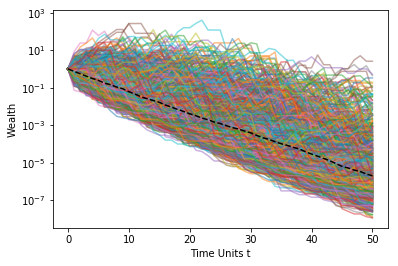

In [23]:
fig, ax = plt.subplots(1,1)
for i in range(N):
    for j in range(N):
        ax.semilogy(AgentsTimeSeries[i,j,:], alpha = 0.5)
        
medians = list()
for t in range(T+1):
    medians  += [np.median(AgentsTimeSeries[:,:,t])]
    
ax.semilogy(medians, c = "k", linestyle= "--")
ax.set_xlabel("Time Units t")
ax.set_ylabel("Wealth")
#ax.semilogy([0,T],[1,1], c="k")
plt.show()


## Boundary Condition for Norm 

No edges


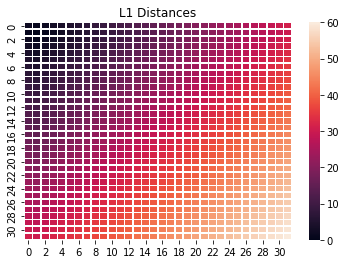

In [24]:
L1Norm  = abs(indices - np.array((1,1))).sum(axis = 1)
L1Norm.reshape((N,N))
ax = sns.heatmap(L1Norm.reshape((N,N)), linewidth=0.5)
plt.title("L1 Distances")
plt.show()

In [25]:
L1Norm  = (abs(indices - np.array((1,1)))%int(max(indices[:,0])-1)).sum(axis = 1)

abs(indices - np.array((1,1))

ax = sns.heatmap(L1Norm.reshape((N,N)), linewidth=0.5)
plt.title("Distances")
plt.show()

SyntaxError: invalid syntax (3324415569.py, line 5)

In [ ]:
x_0, y_0 = 0,0

x,y = abs(indices - np.array((x_0, y_0)))[:,0], abs(indices - np.array((x_0, y_0)))[:,1]
x = np.where(x <= -x+N, x, -x+N) # Boundary Condition
y = np.where(y <= -y+N, y, -y+N)

NewNorm = x+y
ax = sns.heatmap(NewNorm.reshape((N,N)), linewidth=0.5)
plt.title("Distances")
plt.show()

In [ ]:
x_0, y_0 = 31,31

x,y = abs(indices - np.array((x_0, y_0)))[:,0], abs(indices - np.array((x_0, y_0)))[:,1]
x = np.where(x <= -x+N, x, -x+N) # Boundary Condition
y = np.where(y <= -y+N, y, -y+N)

NewNorm = x+y
ax = sns.heatmap(NewNorm.reshape((N,N)), linewidth=0.5)
plt.title("Distances")
plt.show()

In [ ]:
type(x), type(-x+N), type(np.array([2,3]))
print(x, -x+N)
np.where(x <= -x+N, x, -x+N)

In [ ]:
int(N/2)
abs(indices - np.array((7,10)))

In [ ]:
def Flattened_to_2DIndex(Array, n):
    '''
    Array: 1d enumeration of a previously n x n shaped array
    n: integer with len(Array) == n*n
    '''
    assert(len(Array) == n*n)
    i_index = (Array/n).astype(int)
    j_index = Array%n
    output = np.empty((n*n,2))
    output[:,0] = i_index
    output[:,1] = j_index
    return(output)



def Sample_Agent_B(N_agents, Indices_A, Exponent = 2):
    '''
    N_agents: integer (number of agents)
    Indices_A: 2d integer array (kth row of this array gives the x/y coordinates of agent k)
    Exponent: Measures how much the probabiliy decreases with distance to choose the distant agent
    '''
    
    # create 2d enumeration and flatten it
    Enumeration = np.arange(0,N_agents*N_agents).reshape((N_agents,N_agents))
    FlatEnumeration = Enumeration.flatten()
    
    # transform the flattened enumeration to (i,j) indices of the 2d map
    indices = Flattened_to_2DIndex(FlatEnumeration, N_agents)

    # Calculate the L1 Distances from the Indices of A with boundary condition
    xA, yA =  Indices_A # agent A
    x,y = abs(indices - np.array((xA, yA)))[:,0], abs(indices - np.array((xA, yA)))[:,1] # distance to all other agents
    x = np.where(x <= -x+N_agents, x, -x+N_agents) # Boundary Condition
    y = np.where(y <= -y+N_agents, y, -y+N_agents)
    
    Norm  = np.where( x+y >0, x**Exponent + y**Exponent,0)
    Norm.reshape((N_agents,N_agents))
    # Safety check
    #ax = sns.heatmap(Norm.reshape((N_agents,N_agents)), linewidth=0.5)
    #plt.title("Distances")
    #plt.show()
    
    # Now create a list of only those indices that are not A! We want to select a DIFFERENT agent B!
    ListIndices_not_A = list(indices[Norm != 0])
    L = len(ListIndices_not_A)
    
    # Probabilities ~ 1/(Norm) as a model suggestion
    Prob = (1/Norm[Norm!=0]) 
    Prob = Prob/sum(Prob)
    print(Norm)
    print(Prob)
    chosen = np.random.choice(L, p = Prob)
    
    # returns the indices of an agent B with B!=A and (statistically) B close to A
    return(ListIndices_not_A[chosen])
    

In [ ]:
N_test = 3
expon = 0
Sample = np.zeros((N_test,N_test))

I = np.random.randint(0,N_test)
J = np.random.randint(0,N_test)
#print(I,J)
for trial in range(1000):
    chosen = np.random.choice(L, p = Probab)
    chosen, ListIndices_not_i[chosen]
    
    chosenindex = Sample_Agent_B(N_agents = N_test, Indices_A = np.array([I,J]).astype(int),Exponent = expon).astype(int)
    #print(chosenindex)
    Sample[chosenindex[0],chosenindex[1]] += 1
    
ax = sns.heatmap(Sample)#, linewidth=0.5)
plt.scatter([J+0.5],[I+0.5],  c="red", marker="x")  # note that for plotting: x-axis is horizontal and hence the j value
                                                    # and y is vertical (i values): counterintuitive
plt.title("Sampled Agent B for A in ("+str(I)+"/"+str(J)+")")
plt.show()

#I,J

In [ ]:
N_test = 20

Sample = np.zeros((N_test,N_test))

I = 1
J = 1
#print(I,J)
for trial in range(1000):
    chosen = np.random.choice(L, p = Probab)
    chosen, ListIndices_not_i[chosen]
    
    chosenindex = Sample_Agent_B(N_agents = N_test, Indices_A = np.array([I,J]).astype(int), Exponent = 1.5).astype(int)
    #print(chosenindex)
    Sample[chosenindex[0],chosenindex[1]] += 1
    
ax = sns.heatmap(Sample)#, linewidth=0.5)
plt.scatter([J+0.5],[I+0.5],  c="red", marker="x")  # note that for plotting: x-axis is horizontal and hence the j value
                                                    # and y is vertical (i values): counterintuitive
plt.title("Sampled Agent B for A in ("+str(I)+"/"+str(J)+")")
plt.show()

#I,J

# Test the Clustering

In [29]:
n_Ens = 1000
Bottom_Clust = list()
Top_Clust = list()

for Ensemble in range(n_Ens):
    RandomMatrix =  np.random.permutation(AgentsTimeSeries[:,:,-1]) #np.random.normal(size = (N,N) ) #

    RandomBottom = RandomMatrix <= np.quantile(RandomMatrix,0.1)
    Bottom_Clust += [ClusteringRateNeighbour_import(RandomBottom).mean()]
    
    RandomTop = RandomMatrix > np.quantile(RandomMatrix,0.9)
    Top_Clust += [ClusteringRateNeighbour_import(RandomTop).mean()]
    
    #print(np.log(np.quantile(RandomMatrix,0.1)), np.log(np.quantile(RandomMatrix,0.9)))
    
Bottom_Clust = np.array(Bottom_Clust)
Top_Clust = np.array(Top_Clust)
Top_Clust.mean(), Bottom_Clust.mean()

(0.3959611650485437, 0.41768932038834955)

In [96]:
def Cluster(mat, n_ens = 1000, bot = 0.1, top = 0.9):
    
    bottom_clust, top_clust = list(), list()
    
    for ens in range(n_ens):
        randommat = np.random.permutation(mat)
        #print("\n",randommat)
        
        random_bot = (randommat <= np.quantile(randommat, bot))
        #random_bot = randommat
        bottom_clust += [ ClusteringRateNeighbour_import(random_bot).mean()]
        
        
        random_top = (randommat >= np.quantile(randommat, top))
        #random_top = randommat
        top_clust += [ ClusteringRateNeighbour_import(random_top).mean()]
        
        #print(ClusteringRateNeighbour_import(random_bot).mean(),
         #    ClusteringRateNeighbour_import(random_top).mean())
        
    return(np.round(np.array([np.array(bottom_clust).mean(),np.array(bottom_clust).std(),
           np.array(top_clust).mean(),np.array(top_clust).std()]),2))

In [67]:
M = np.array([1,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0]).reshape((4,4))
M

array([[1, 0, 0, 1],
       [0, 0, 0, 1],
       [0, 1, 0, 0],
       [1, 0, 0, 0]])

In [70]:
Cluster(M, 10)

/home/users/t_wand01/.local/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: Mean of empty slice.
  app.launch_new_instance()


(1.0, nan)

In [87]:
M0 = np.random.normal(0,1,(32,32))
M1 = M0 + 10*np.abs(np.min(M0)) # just positive
M2 = np.log(M1)
M3 = 10**M0

In [108]:
for i in range(50):
    print("\n")
    print(i, np.quantile(AgentsTimeSeries[:,:,1+i], 0.1), np.median(AgentsTimeSeries[:,:,1+i]),
          np.quantile(AgentsTimeSeries[:,:,1+i], 0.9))
    print(Cluster(AgentsTimeSeries[:,:,1+i]),100)



0 0.30630576900515943 0.7467436406404574 1.9532563593595427
[0.37 0.05 0.32 0.04] 100


1 0.18881557886642397 0.5532563593595426 1.9532563593595427
[0.4  0.04 0.38 0.04] 100


2 0.12779270444070026 0.41488791650786877 2.2338866095438386
[0.33 0.05 0.31 0.05] 100


3 0.08547581766468752 0.3093551843933039 2.1856063855448733
[0.37 0.04 0.37 0.04] 100


4 0.05678833306842985 0.24264101813137046 2.2276124010332787
[0.36 0.04 0.37 0.04] 100


5 0.03443398846590614 0.1764588148002627 2.094030523014433
[0.42 0.04 0.33 0.04] 100


6 0.02501516483089776 0.14314266102128348 1.7510397461101326
[0.38 0.04 0.37 0.05] 100


7 0.018072798703127946 0.1072391965722381 1.4343002525945103
[0.42 0.04 0.37 0.04] 100


8 0.012140889674501613 0.08734120663579542 1.4834504855619044
[0.39 0.04 0.36 0.04] 100


9 0.009134336585581014 0.06090265407256125 1.2597734469472137
[0.45 0.04 0.41 0.04] 100


10 0.006332810315453906 0.04555166103588559 0.9557830104214644
[0.47 0.04 0.31 0.04] 100


11 0.004591666594203

In [97]:
Cluster(M0)

array([0.35, 0.04, 0.28, 0.05])

In [98]:
Cluster(M1)

array([0.35, 0.04, 0.28, 0.05])

In [99]:
Cluster(M2)

array([0.35, 0.04, 0.28, 0.05])

In [100]:
Cluster(M3)

array([0.35, 0.04, 0.28, 0.05])

In [104]:
Cluster(AgentsTimeSeries[:,:,-1])

array([0.42, 0.04, 0.4 , 0.04])

In [107]:
Cluster( np.log((AgentsTimeSeries[:,:,1+i])/np.std(AgentsTimeSeries[:,:,1+i])) )

array([0.42, 0.04, 0.4 , 0.04])

In [110]:
np.array([2,2,5,1,0]).argsort().argsort()

array([2, 3, 4, 1, 0])